In [41]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import behavior.behavioral_epoch_tools as bet
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [3]:
# Initiate the spike collection object
object_collection = sc.SpikeCollection(path = r"C:\Users\zhaoz\Desktop\Research\data", sampling_rate= 20000)

loading  22_object_merged.rec
loading  23_object_merged.rec
23_object_merged.rec has no good units
and will not be included in the collection
loading  31_object_merged.rec
loading  32_object_merged.rec
loading  41_object_merged.rec
loading  44_object_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [4]:
# Print the recordings detail
object_collection.recording_details()

Recording Details:

Recording: 22_object_merged.rec
  Subject: Unknown
  Number of Good Units: 14
  Recording Length: 30.18 minutes
  Events per Event Type: {}

Recording: 31_object_merged.rec
  Subject: Unknown
  Number of Good Units: 1
  Recording Length: 30.51 minutes
  Events per Event Type: {}

Recording: 32_object_merged.rec
  Subject: Unknown
  Number of Good Units: 9
  Recording Length: 30.52 minutes
  Events per Event Type: {}

Recording: 41_object_merged.rec
  Subject: Unknown
  Number of Good Units: 23
  Recording Length: 30.51 minutes
  Events per Event Type: {}

Recording: 44_object_merged.rec
  Subject: Unknown
  Number of Good Units: 4
  Recording Length: 30.16 minutes
  Events per Event Type: {}



In [5]:
event_dict = {}
subject_dict = {}
mouse_in_dict = {}
mouse_out_dict = {}
for file in os.listdir(r"C:\Users\zhaoz\Desktop\Research\data\aggregated_csvs"):
    recording_name_parts = (file.split(".")[0]).split("_")[:-1]
    recording_name = "_".join(recording_name_parts) + "_merged.rec"
    if file.endswith(".csv"):
        behavior = ['facial sniffing', 'anogenital sniffing']
        rec_event_dict = {}
        min_iti = 1
        min_bout = 0.5
        behavior_path = r"C:\Users\zhaoz\Desktop\Research\data\aggregated_csvs\\" + file
        behavior_df = pd.read_csv(behavior_path)
        subject_only_sniffing = boris.get_behavior_bouts(behavior_df,
                                                         subject = ['subject'],
                                                         behavior = behavior,
                                                         min_iti = min_iti,
                                                         min_bout = min_bout)
        agent_only_sniffing = boris.get_behavior_bouts(behavior_df,
                                                         subject = ['social_agent'],
                                                         behavior = behavior,
                                                         min_iti = min_iti,
                                                         min_bout = min_bout)
        duplicate_dict = bet.overlapping_events(eventA = subject_only_sniffing,
                                                eventB = agent_only_sniffing,
                                                overlap_threshold = .5,
                                                mode = 'duplicate',
                                                return_nonoverlap = True)
        rec_event_dict['subject only sniffing'] = duplicate_dict['eventA']
        rec_event_dict['social agent only sniffing'] = duplicate_dict['eventB']
        rec_event_dict['reciprocal sniffing'] = duplicate_dict['event1']
        event_dict[recording_name] = rec_event_dict
        subject = recording_name_parts[0]
        subject_dict[recording_name] = subject
        # mouse in and mouse out
        mouse_in = list(behavior_df[behavior_df['Behavior'] == 'mice back in']['Start (s)'])
        mouse_out = list(behavior_df[behavior_df['Behavior'] == 'mice taken out']['Start (s)'])
        if file == '23_object_TBCN.csv':
            mouse_in.insert(0, 602)
            mouse_out.insert(0, 900)
            mouse_in.insert(1, 902)
            mouse_out.insert(1, 1201)
        if file == '32_object_NBTC.csv': 
            mouse_in.insert(1, 922)
            mouse_in.insert(2, 1222)
            mouse_out.insert(1, 1222)
            mouse_out.insert(2,1521)
        if file == '31_object_BNTC.csv':
            mouse_in.insert(0, 608)
            mouse_in.insert(2, 1213)
            mouse_out.insert(0, 906)
            mouse_out.insert(2,1521)
        mouse_in_dict[file] = mouse_in
        mouse_out_dict[file] = mouse_out
        

print(event_dict.keys())
print(subject_dict)
print(mouse_in_dict)
print(mouse_out_dict)

dict_keys(['22_object_merged.rec', '23_object_merged.rec', '31_object_merged.rec', '32_object_merged.rec', '41_object_merged.rec', '44_object_merged.rec'])
{'22_object_merged.rec': '22', '23_object_merged.rec': '23', '31_object_merged.rec': '31', '32_object_merged.rec': '32', '41_object_merged.rec': '41', '44_object_merged.rec': '44'}
{'22_object_CTBN.csv': [601.2, 915.333, 1199.933, 1515.467], '23_object_TBCN.csv': [602, 902, 1203.6, 1519.533], '31_object_BNTC.csv': [608, 906.667, 1213, 1511.733], '32_object_NBTC.csv': [620.333, 922, 1222, 1523.0], '41_object_BCNT.csv': [610.705, 910.601, 1230.585, 1529.239], '44_object_TCNB.csv': [608.6, 904.667, 1221.733, 1532.467]}
{'22_object_CTBN.csv': [910.533, 1199.867, 1504.733], '23_object_TBCN.csv': [900, 1201, 1505.0], '31_object_BNTC.csv': [906, 1212.2, 1521], '32_object_NBTC.csv': [922.067, 1222, 1521], '41_object_BCNT.csv': [909.851, 1213.086, 1526.238], '44_object_TCNB.csv': [904.533, 1209.333, 1524.8]}


In [6]:
object_collection = sc.SpikeCollection(path = r"C:\Users\zhaoz\Desktop\Research\data",
									   event_dict = event_dict,
									   subject_dict = subject_dict,
									   sampling_rate = 20000)
object_collection.event_dict

loading  22_object_merged.rec
loading  23_object_merged.rec
23_object_merged.rec has no good units
and will not be included in the collection
loading  31_object_merged.rec
loading  32_object_merged.rec
loading  41_object_merged.rec
loading  44_object_merged.rec


{'22_object_merged.rec': {'subject only sniffing': array([[ 605.4  ,  606.399],
         [ 607.6  ,  612.6  ],
         [ 614.133,  615.067],
         [ 616.267,  616.933],
         [ 628.2  ,  632.733],
         [ 642.467,  645.066],
         [ 677.867,  680.533],
         [ 693.933,  696.467],
         [ 816.4  ,  818.267],
         [ 877.533,  878.732],
         [ 883.2  ,  885.4  ],
         [1520.133, 1526.399],
         [1527.4  , 1531.467],
         [1532.667, 1533.332],
         [1541.   , 1543.133],
         [1545.   , 1545.599],
         [1549.533, 1551.8  ],
         [1558.467, 1563.266],
         [1578.267, 1578.932],
         [1586.333, 1589.466],
         [1590.467, 1591.399],
         [1597.267, 1598.399],
         [1620.533, 1621.4  ],
         [1649.067, 1649.6  ],
         [1656.467, 1660.667],
         [1674.667, 1680.   ],
         [1688.133, 1689.2  ],
         [1693.533, 1695.799],
         [1722.867, 1723.932],
         [1740.133, 1741.4  ],
         [1749.733, 1

In [24]:
conditions = ['familiar mouse', 'novel mouse']
order_dict = {'T': 'novel object', 'B': 'familiar object', 'N': 'novel mouse', 'C': 'familiar mouse'}

fam_subject_only = {}
fam_social_agent_only = {}
fam_reciprocal = {}

nov_subject_only = {}
nov_social_agent_only = {}
nov_reciprocal = {}

for recording, all_events in object_collection.event_dict.items():
	recording_behavior = {}
	order = ''
	file = ''
	for behavior, events in all_events.items():
		for filename in mouse_in_dict.keys():
			if (recording.split(".")[0]).split("_")[0] == (filename.split(".")[0]).split("_")[0]:
				order = filename.split("_")[-1].split(".")[0]
				file = filename
	
	for i in range(len(conditions)):
		for j in range(len(order)):
			if conditions[i] == order_dict[order[j]]:
				# subject only for either familiar/novel
				try: 
					mask = (all_events['subject only sniffing'][:, 0] > mouse_in_dict[file][j]) & (all_events['subject only sniffing'][:, 0] < mouse_out_dict[file][j])
				except IndexError:
					mask = (all_events['subject only sniffing'][:, 0] < mouse_out_dict[file][0]) if j == 0 else (all_events['subject only sniffing'][:, 0] > mouse_in_dict[file][3])
				if i == 0:
					fam_subject_only[recording] = all_events['subject only sniffing'][mask]
				else:
					nov_subject_only[recording] = all_events['subject only sniffing'][mask]
				# social agent only for either familiar/novel
				try: 
					mask = (all_events['social agent only sniffing'][:, 0] > mouse_in_dict[file][j]) & (all_events['social agent only sniffing'][:, 0] < mouse_out_dict[file][j])
				except IndexError:
					mask = (all_events['social agent only sniffing'][:, 0] < mouse_out_dict[file][0]) if j == 0 else (all_events['social agent only sniffing'][:, 0] > mouse_in_dict[file][3])
				if i == 0:
					fam_social_agent_only[recording] = all_events['social agent only sniffing'][mask]
				else:
					nov_social_agent_only[recording] = all_events['social agent only sniffing'][mask]
				# reciprocal for either familiar/novel
				try: 
					mask = (all_events['reciprocal sniffing'][:, 0] > mouse_in_dict[file][j]) & (all_events['reciprocal sniffing'][:, 0] < mouse_out_dict[file][j])
				except IndexError:
					mask = (all_events['reciprocal sniffing'][:, 0] < mouse_out_dict[file][0]) if j == 0 else (all_events['reciprocal sniffing'][:, 0] > mouse_in_dict[file][3])
				if i == 0:
					fam_reciprocal[recording] = all_events['reciprocal sniffing'][mask]
				else:
					nov_reciprocal[recording] = all_events['reciprocal sniffing'][mask]

'''
print("fam_subject_only:", fam_subject_only)
print("fam_social_agent_only:", fam_social_agent_only)
print("fam_reciprocal:", fam_reciprocal)

print("nov_subject_only:", nov_subject_only)
print("nov_social_agent_only:", nov_social_agent_only)
print("nov_reciprocal:", nov_reciprocal)
'''

fam_subject_only_event_length = []
fam_social_agent_only_event_length = []
fam_reciprocal_event_length = []

nov_subject_only_event_length = []
nov_social_agent_only_evnet_length = []
nov_reciprocal_event_length = []

for recording, events in fam_subject_only.items():
	for row in events:
		fam_subject_only_event_length.append(row[1] - row[0])
for recording, events in fam_social_agent_only.items():
	for row in events:
		fam_social_agent_only_event_length.append(row[1] - row[0])
for recording, events in fam_reciprocal.items():
	for row in events:
		fam_reciprocal_event_length.append(row[1] - row[0])
for recording, events in nov_subject_only.items():
	for row in events:
		nov_subject_only_event_length.append(row[1] - row[0])
for recording, events in nov_social_agent_only.items():
	for row in events:
		nov_social_agent_only_evnet_length.append(row[1] - row[0])
for recording, events in nov_reciprocal.items():
	for row in events:
		nov_reciprocal_event_length.append(row[1] - row[0])
print(fam_subject_only_event_length)

[np.float64(0.9990000000000236), np.float64(5.0), np.float64(0.9339999999999691), np.float64(0.66599999999994), np.float64(4.532999999999902), np.float64(2.5990000000000464), np.float64(2.6660000000000537), np.float64(2.533999999999992), np.float64(1.8670000000000755), np.float64(1.1989999999999554), np.float64(2.199999999999932), np.float64(0.8669999999999618), np.float64(1.7339999999999236), np.float64(3.2669999999998254), np.float64(0.7329999999999472), np.float64(0.7330000000001746), np.float64(0.5339999999998781), np.float64(1.0670000000000073), np.float64(1.066000000000031), np.float64(0.5329999999999018), np.float64(1.066000000000031), np.float64(3.2669999999998254), np.float64(25.799999999999955), np.float64(25.799999999999955), np.float64(2.866999999999962), np.float64(4.004000000000019), np.float64(2.5), np.float64(1.149000000000001), np.float64(0.7459999999999809), np.float64(1.5009999999999764), np.float64(4.751999999999953), np.float64(1.7509999999999764), np.float64(4.997

In [34]:
def plot_sniffing(data, ylabel, title):
	x = np.arange(len(conditions))
	width = 0.25
	multiplier = 0

	fig, ax = plt.subplots(layout = 'constrained')

	for condition, measurement in data.items():
		offset = width*multiplier
		rects = ax.bar(x + offset, measurement, width, label = condition)
		ax.bar_label(rects, padding = 3)
		multiplier += 1

	ax.set_ylabel(ylabel)
	ax.set_title(title)
	ax.set_xticks(x + width, conditions)
	ax.legend()
	plt.show()

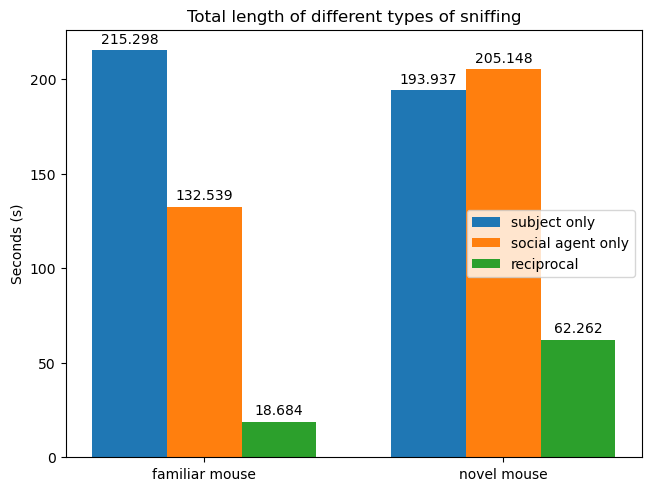

In [35]:
total_length = {
	'subject only': (np.array(fam_subject_only_event_length).sum(), np.array(nov_subject_only_event_length).sum()),
	'social agent only': (np.array(fam_social_agent_only_event_length).sum(), np.array(nov_social_agent_only_evnet_length).sum()),
	'reciprocal': (np.array(fam_reciprocal_event_length).sum(), np.array(nov_reciprocal_event_length).sum())
}
plot_sniffing(total_length, 'Seconds (s)', 'Total length of different types of sniffing')

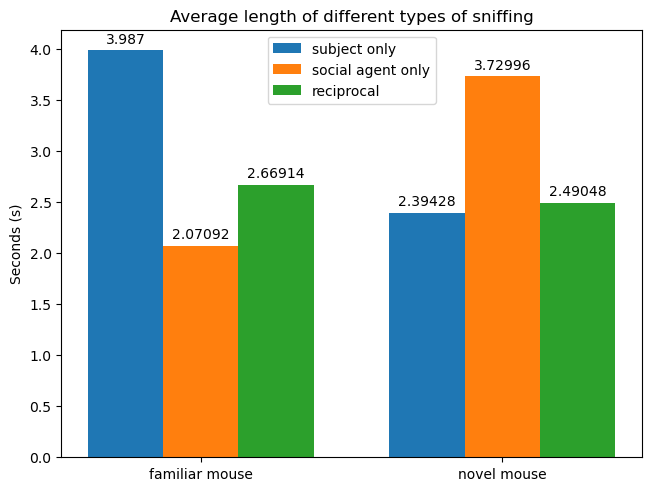

familiar mouse subject only vs social agent only:
t-statistic: 2.4101
Raw p-value: 0.0190

familiar mouse subject only vs reciprocal:
t-statistic: 1.2969
Raw p-value: 0.2055

familiar mouse social agent only vs reciprocal:
t-statistic: -0.8608
Raw p-value: 0.4172

novel mouse subject only vs social agent only:
t-statistic: -2.4710
Raw p-value: 0.0150

novel mouse subject only vs reciprocal:
t-statistic: -0.1818
Raw p-value: 0.8564

novel mouse social agent only vs reciprocal:
t-statistic: 2.0596
Raw p-value: 0.0433


In [44]:
aver_length = {
	'subject only': (np.array(fam_subject_only_event_length).sum()/len(fam_subject_only_event_length), 
				  np.array(nov_subject_only_event_length).sum()/len(nov_subject_only_event_length)),
	'social agent only': (np.array(fam_social_agent_only_event_length).sum()/len(fam_social_agent_only_event_length), 
					   np.array(nov_social_agent_only_evnet_length).sum()/len(nov_social_agent_only_evnet_length)),
	'reciprocal': (np.array(fam_reciprocal_event_length).sum()/len(fam_reciprocal_event_length),
				 np.array(nov_reciprocal_event_length).sum()/len(nov_reciprocal_event_length))
}
plot_sniffing(aver_length, 'Seconds (s)', 'Average length of different types of sniffing')

fam_sub_vs_soc_t_stat, fam_sub_vs_soc_p_val = stats.ttest_ind(fam_subject_only_event_length, fam_social_agent_only_event_length, equal_var = False)
fam_sub_vs_rec_t_stat, fam_sub_vs_rec_p_val = stats.ttest_ind(fam_subject_only_event_length, fam_reciprocal_event_length, equal_var = False)
fam_soc_vs_rec_t_stat, fam_soc_vs_rec_p_val = stats.ttest_ind(fam_social_agent_only_event_length, fam_reciprocal_event_length, equal_var = False)
nov_sub_vs_soc_t_stat, nov_sub_vs_soc_p_val = stats.ttest_ind(nov_subject_only_event_length, nov_social_agent_only_evnet_length, equal_var = False)
nov_sub_vs_rec_t_stat, nov_sub_vs_rec_p_val = stats.ttest_ind(nov_subject_only_event_length, nov_reciprocal_event_length, equal_var = False)
nov_soc_vs_rec_t_stat, nov_soc_vs_rec_p_val = stats.ttest_ind(nov_social_agent_only_evnet_length, nov_reciprocal_event_length, equal_var = False)

# familiar mouse subject only vs social agent only
print("familiar mouse subject only vs social agent only:")
print(f"t-statistic: {fam_sub_vs_soc_t_stat:.4f}")
print(f"Raw p-value: {fam_sub_vs_soc_p_val:.4f}")

# familiar mouse subject only vs reciprocal
print("\nfamiliar mouse subject only vs reciprocal:")
print(f"t-statistic: {fam_sub_vs_rec_t_stat:.4f}")
print(f"Raw p-value: {fam_sub_vs_rec_p_val:.4f}")

# familiar mouse social agent only vs reciprocal
print("\nfamiliar mouse social agent only vs reciprocal:")
print(f"t-statistic: {fam_soc_vs_rec_t_stat:.4f}")
print(f"Raw p-value: {fam_soc_vs_rec_p_val:.4f}")

# novel mouse subject only vs social agent only
print("\nnovel mouse subject only vs social agent only:")
print(f"t-statistic: {nov_sub_vs_soc_t_stat:.4f}")
print(f"Raw p-value: {nov_sub_vs_soc_p_val:.4f}")

# novel mouse subject only vs reciprocal
print("\nnovel mouse subject only vs reciprocal:")
print(f"t-statistic: {nov_sub_vs_rec_t_stat:.4f}")
print(f"Raw p-value: {nov_sub_vs_rec_p_val:.4f}")

# novel mouse social agent only vs reciprocal
print("\nnovel mouse social agent only vs reciprocal:")
print(f"t-statistic: {nov_soc_vs_rec_t_stat:.4f}")
print(f"Raw p-value: {nov_soc_vs_rec_p_val:.4f}")

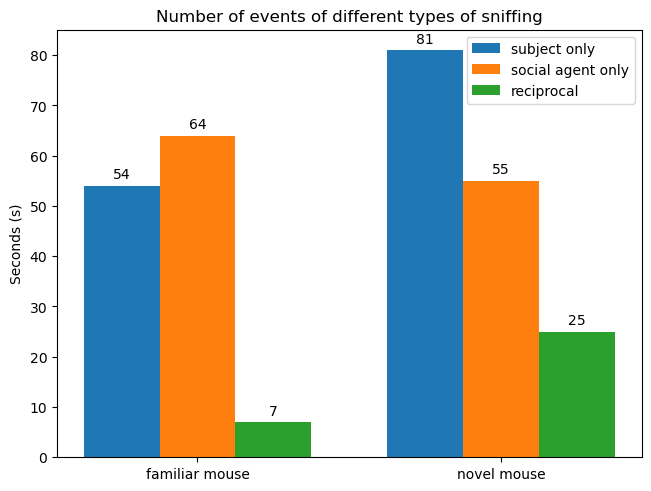

In [40]:
n_o_events = {
	'subject only': (len(fam_subject_only_event_length), len(nov_subject_only_event_length)),
	'social agent only': (len(fam_social_agent_only_event_length), len(nov_social_agent_only_evnet_length)),
	'reciprocal': (len(fam_reciprocal_event_length), len(nov_reciprocal_event_length))
}
plot_sniffing(n_o_events, 'Seconds (s)', 'Number of events of different types of sniffing')